<a href="https://colab.research.google.com/github/Brauliovh3/web/blob/main/Matriz%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
print("Librerias importadas con exito")

Librerias importadas con exito


In [18]:
#1 CARGAR Y PREPARAR DATOS

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

print(f"✅ Datos: {x_train.shape[0]} entrenamiento, {x_test.shape[0]} prueba")

✅ Datos: 60000 entrenamiento, 10000 prueba


In [19]:
#2 CREAR Y ENTRENAR MODELO CNN

modelo = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

modelo.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
modelo.summary()

print("\n🚀 Entrenando...")
historial = modelo.fit(x_train, y_train_cat, batch_size=128, epochs=5,
                       validation_split=0.2, verbose=1)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


🚀 Entrenando...
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 51s 131ms/step - accuracy: 0.7782 - loss: 0.6984 - val_accuracy: 0.9764 - val_loss: 0.0767
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 61s 162ms/step - accuracy: 0.9655 - loss: 0.1170 - val_accuracy: 0.9838 - val_loss: 0.0537
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 124ms/step - accuracy: 0.9745 - loss: 0.0839 - val_accuracy: 0.9863 - val_loss: 0.0448
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 114ms/step - accuracy: 0.9799 - loss: 0.0669 - val_accuracy: 0.9869 - val_loss: 0.0423
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.9828 - loss: 0.0536 - val_accuracy: 0.9888 - val_loss: 0.0411


In [23]:
#3 EVALUAR Y PREDECIR

y_pred = modelo.predict(x_test, verbose=0)
y_pred_clases = np.argmax(y_pred, axis=1)
test_loss, test_acc = modelo.evaluate(x_test, y_test_cat, verbose=0)

print(f"\n✅ EXACTITUD: {test_acc*100:.2f}%")
print(f"📉 PÉRDIDA: {test_loss:.4f}")

print("\n📊 REPORTE DE CLASIFICACIÓN:\n")
print(classification_report(y_test, y_pred_clases,
                          target_names=[f'Número {i}' for i in range(10)]))


✅ EXACTITUD: 98.94%
📉 PÉRDIDA: 0.0327

📊 REPORTE DE CLASIFICACIÓN:

              precision    recall  f1-score   support

    Número 0       0.99      0.99      0.99       980
    Número 1       0.99      1.00      1.00      1135
    Número 2       0.99      0.99      0.99      1032
    Número 3       0.99      0.99      0.99      1010
    Número 4       0.99      1.00      0.99       982
    Número 5       0.99      0.98      0.99       892
    Número 6       0.99      0.99      0.99       958
    Número 7       0.99      0.98      0.98      1028
    Número 8       0.98      0.99      0.99       974
    Número 9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



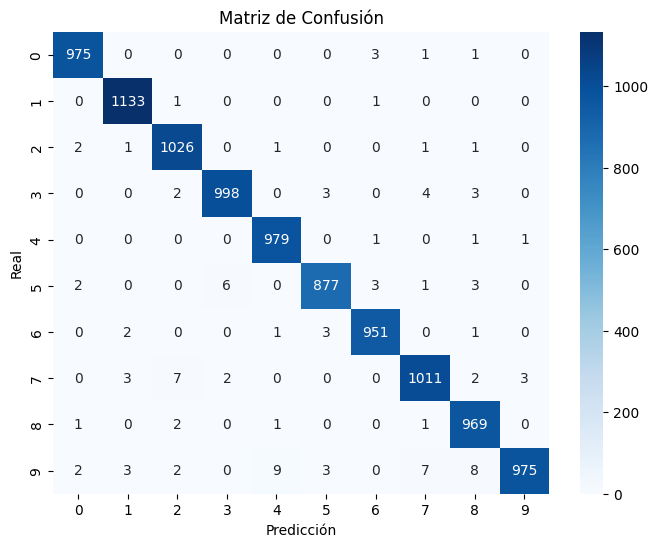

In [21]:
#4 MATRIZ DE CONFUSIÓN

cm = confusion_matrix(y_test, y_pred_clases)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

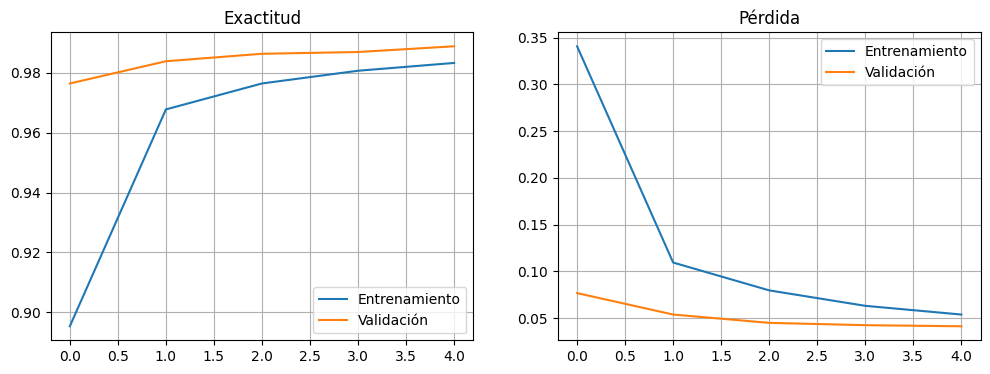

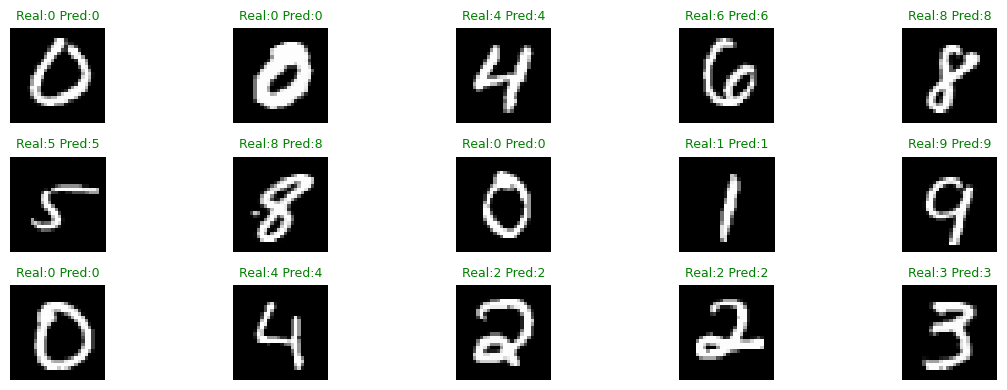

In [25]:
#5 VISUALIZAR RESULTADOS

# Gráfica de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.title('Exactitud')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

# Predicciones
indices = np.random.choice(len(x_test), 15, replace=False)
plt.figure(figsize=(12, 4))
for i, idx in enumerate(indices):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    real, pred = y_test[idx], y_pred_clases[idx]
    color = 'green' if real == pred else 'red'
    plt.title(f'Real:{real} Pred:{pred}', color=color, fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()
